In [90]:
from DQbee.DQuadratization import *
from DQbee.EquationSystem import *
from qbee import *
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
import numpy as np

### Comparison of the stability of ODEs system

---

$$
\text{Stable case:}
\begin{cases}
x' = -x + xy\\
y’ = -2y + 2y^2
\end{cases} \quad
\text{Unstable case:}
\begin{cases}
x' = -x + xy\\
y' = 2y - 4x^2 + 2y^2
\end{cases} \quad
\text{Uncertain case:}
\begin{cases}
x' = -x + xy\\
y’ = -2x^2 + 2y^2
\end{cases}
$$

In [91]:
x, y, t = sp.symbols('x y t')

system_original = [-x + x ** 3]
system_stable = [-x + x * y, - 2 * y + 2 * y ** 2]
system_unstable = [-x + x * y, 10 * y - 12 * x ** 2 + 2 * y ** 2]

initial_condition = [0.1, 0.01]

<lambdifygenerated-96>:3: RuntimeWarning: overflow encountered in double_scalars
  return [x*y - x, -12*x**2 + 2*y**2 + 10*y]
<lambdifygenerated-96>:3: RuntimeWarning: invalid value encountered in double_scalars
  return [x*y - x, -12*x**2 + 2*y**2 + 10*y]


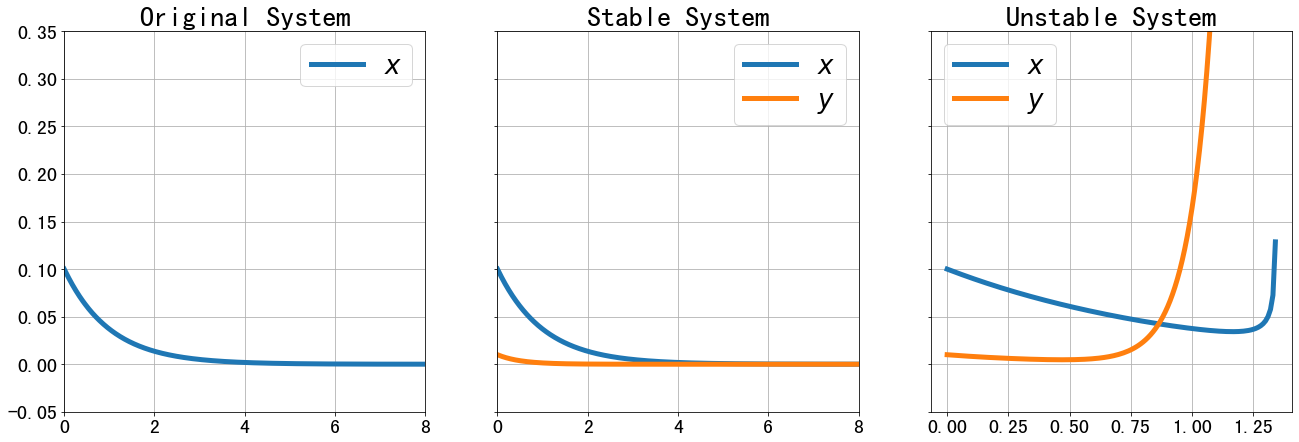

In [92]:
fun_system_original = sp.lambdify((t, [x]), system_original, 'numpy')
fun_system_stable = sp.lambdify((t, [x, y]), system_stable, 'numpy')
fun_system_unstable = sp.lambdify((t, [x, y]), system_unstable, 'numpy')

t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol_original = solve_ivp(fun_system_original, t_span, [0.1], t_eval=t_eval, method='LSODA')
sol_stable = solve_ivp(fun_system_stable, t_span, initial_condition, t_eval=t_eval, method='LSODA')
sol_unstable = solve_ivp(fun_system_unstable, t_span, initial_condition, t_eval=t_eval, method='LSODA')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 7), sharey=True)

ax1.plot(sol_original.t, sol_original.y[0], label=r'$x$', linewidth=5)
ax1.set_title(r'Original System', size=28)
ax1.legend(loc='best', prop={'size': 26})
ax1.set_ylim(-0.05, 0.35)
ax1.set_xlim(0, 8)
ax1.grid()

ax2.plot(sol_stable.t, sol_stable.y[0], label=r'$x$', linewidth=5)
ax2.plot(sol_stable.t, sol_stable.y[1], label=r'$y$', linewidth=5)
ax2.legend(loc='best', prop={'size': 26})
ax2.set_title(r'Stable System', size=28)
ax2.set_xlim(0, 8)
ax2.grid()

ax3.plot(sol_unstable.t, sol_unstable.y[0], label=r'$x$', linewidth=5)
ax3.plot(sol_unstable.t, sol_unstable.y[1], label=r'$y$', linewidth=5)
ax3.legend(loc='best', prop={'size': 26})
ax3.set_title(r'Unstable System', size=28)
ax3.grid()

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)

plt.savefig("../figure/example2.png", dpi=1000, bbox_inches = 'tight')

plt.show()